Request error: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x00000246674E1880>, 'Connection to api.open-notify.org timed out. (connect timeout=10)'))
Request error: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x0000024666E7BFE0>, 'Connection to api.open-notify.org timed out. (connect timeout=10)'))
Request error: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x00000246674E1FA0>, 'Connection to api.open-notify.org timed out. (connect timeout=10)'))
Request error: HTTPConnectionPool(host='api.open-notify.org', port=80): Max retries exceeded with url: /iss-now.json (Caused by ConnectTimeoutError(

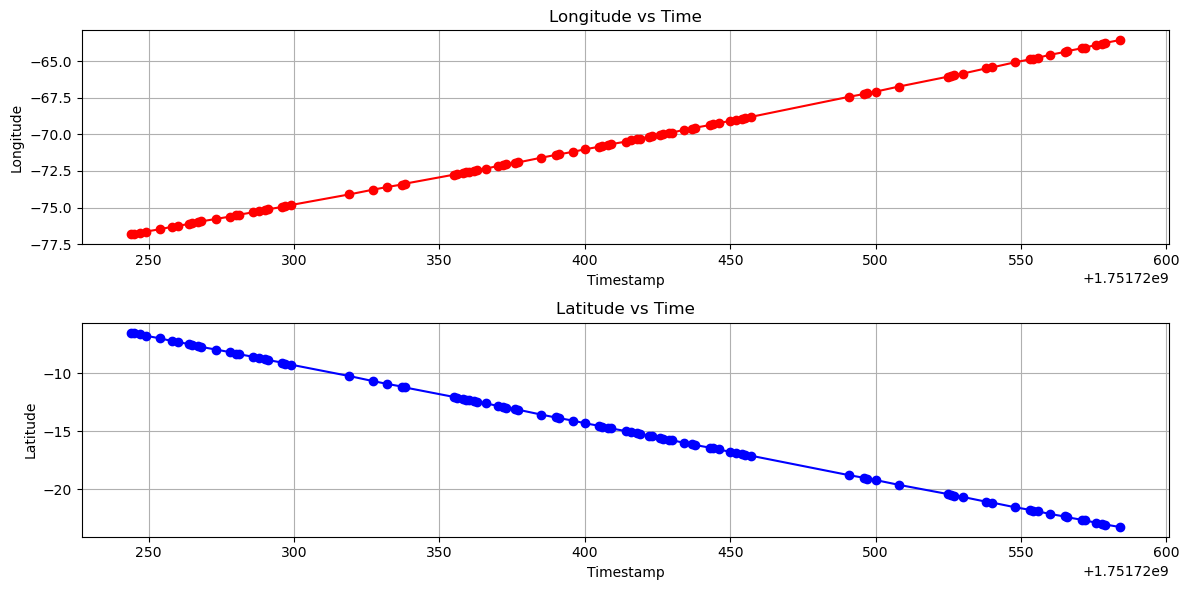

In [14]:
import requests
import time
import matplotlib.pyplot as plt
import json

latitude = []
longitude = []
time_stamp = []

url = "http://api.open-notify.org/iss-now.json"

for i in range(100):
    try:
        # Add timeout parameter to prevent hanging indefinitely
        response = requests.get(url, timeout=10)
        
        # Check if the request was successful
        if response.status_code == 200:
            result = response.json()
            
            if result["message"] == "success":
                coordinate = result["iss_position"]
                lat_pos = float(coordinate["latitude"])
                long_pos = float(coordinate["longitude"])
                time_sta = result["timestamp"]
                
                latitude.append(lat_pos)
                longitude.append(long_pos)
                time_stamp.append(time_sta)
        else:
            print(f"Request failed with status code: {response.status_code}")
            
    except requests.exceptions.RequestException as e:
        
        print(f"Request error: {e}")
        
        time.sleep(5)
        continue
    
    time.sleep(1)


if latitude and longitude and time_stamp:
    plt.figure(figsize=(12, 6))

    plt.subplot(2, 1, 1)
    plt.plot(time_stamp, longitude, marker='o', color='r')
    plt.title('Longitude vs Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Longitude')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(time_stamp, latitude, marker='o', color='b')
    plt.title('Latitude vs Time')
    plt.xlabel('Timestamp')
    plt.ylabel('Latitude')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print("No data was collected. Check your internet connection or if the API is available.")
